## <span style="color:red">Visualisation</span>

In [18]:
%run data_cleaning_library.py # on charge toutes les librairies et fonctions qui ont été crées. 

In [3]:
article_titles = load_dict("nostopwords")
dict(list(article_titles.items())[0:1]) # affichage des 5 premiers éléments du dictionnaire

{'journals/nar/NakamuraGI98': ['codon',
  'usage',
  'tabulated',
  'dna',
  'sequence',
  'databases']}

In [4]:
article_titles_lemmatized = load_dict("lemmatized")
dict(list(article_titles_lemmatized.items())[0:1]) # affichage des 5 premiers éléments du dictionnaire

{'journals/nar/NakamuraGI98': ['codon',
  'usage',
  'tabulate',
  'dna',
  'sequence',
  'database']}

In [8]:
token_list1 = list(article_titles.values())
token_list2 = list(article_titles_lemmatized.values())

In [10]:
# On va générer un nuage de mots à l'aide de la librairy wordcloud
# Pour cela il faut inclure tous les mots ensemble, séparés par un espace
all_words_1=''
all_words_2=''
for i in range(len(token_list1)):
    all_words_1=all_words_1 + ' '.join([k for k in token_list1[i]])
    all_words_2=all_words_2 + ' '.join([k for k in token_list2[i]])

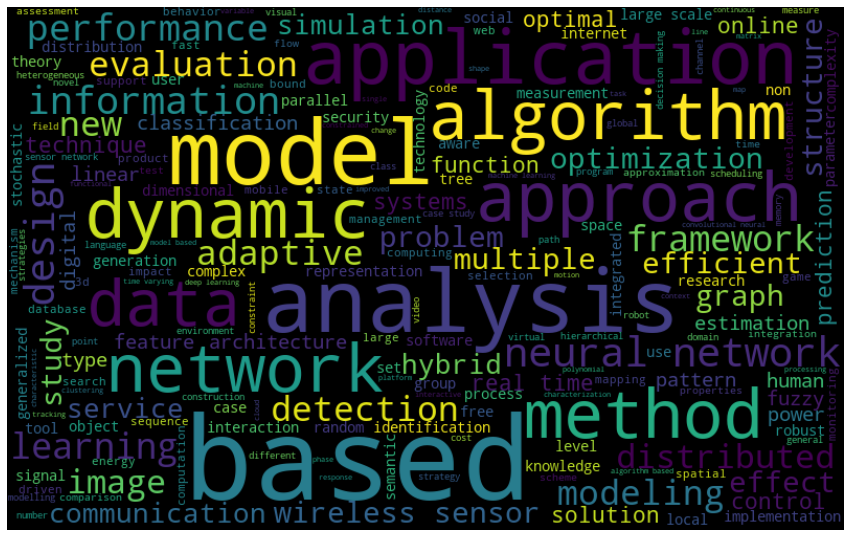

In [11]:
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(all_words_1)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/before_lemmatization.png',transparent=False)

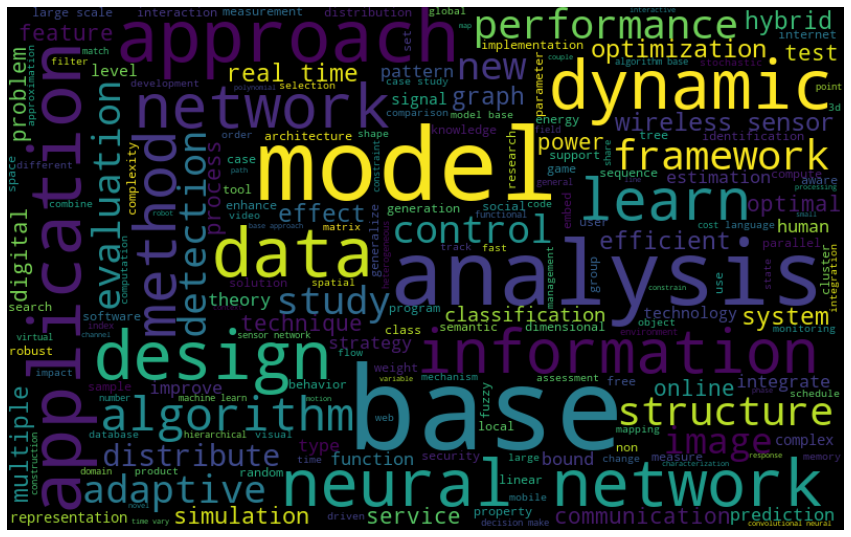

In [12]:
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(all_words_2)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/after_lemmatization.png',transparent=False)

In [14]:
import seaborn as sns
from collections import Counter


all_words1=''
all_words2=''
for i in range(len(token_list1)):
    all_words1=all_words1 + ' '.join([k for k in token_list1[i]])
    all_words2=all_words2 + ' '.join([k for k in token_list2[i]])

# counts = Counter(all_words) : si on fait on aura la liste des lettres les plus courantes...
all_words_list1 = all_words1.split()
all_words_list2 = all_words2.split()
counts1 = Counter(all_words_list1)
counts2 = Counter(all_words_list2)

common_words1 = [word[0] for word in counts1.most_common(25)]
common_counts1 = [word[1] for word in counts1.most_common(25)]

common_words2 = [word[0] for word in counts2.most_common(25)]
common_counts2 = [word[1] for word in counts2.most_common(25)]

#### <span style="color:red">Avant lemmatisation</span>

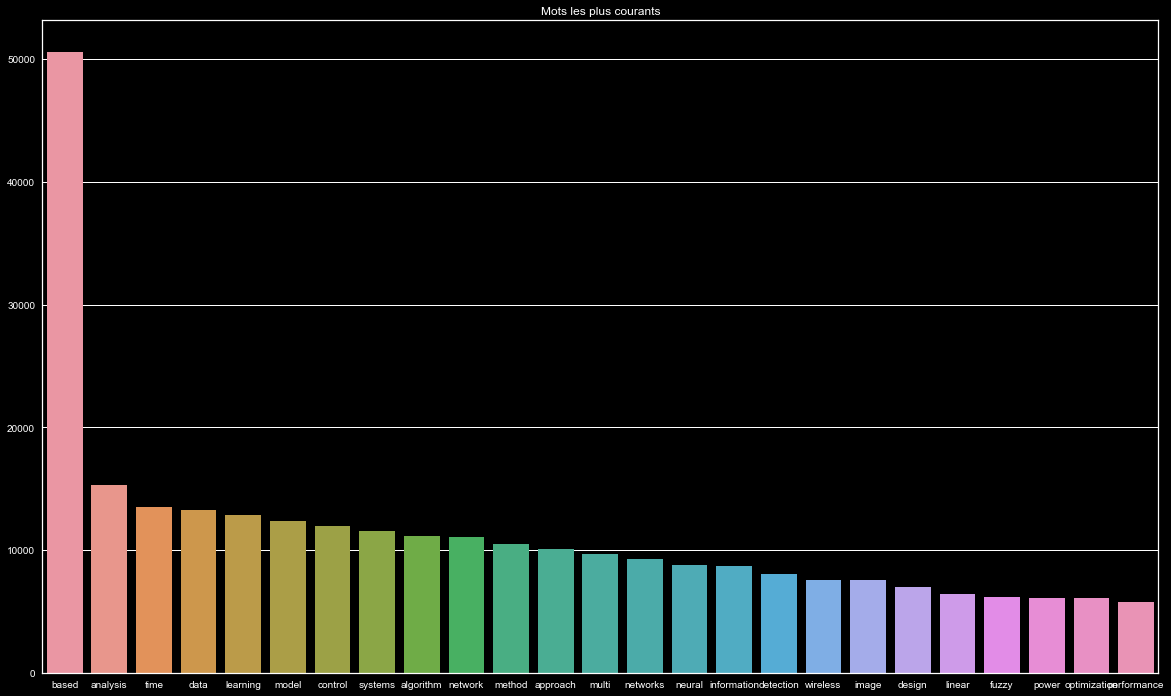

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=common_words1,y=common_counts1)
plt.title('Mots les plus courants')
plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/count_before_lemmatization.png')

#### <span style="color:red">Après lemmatisation</span>

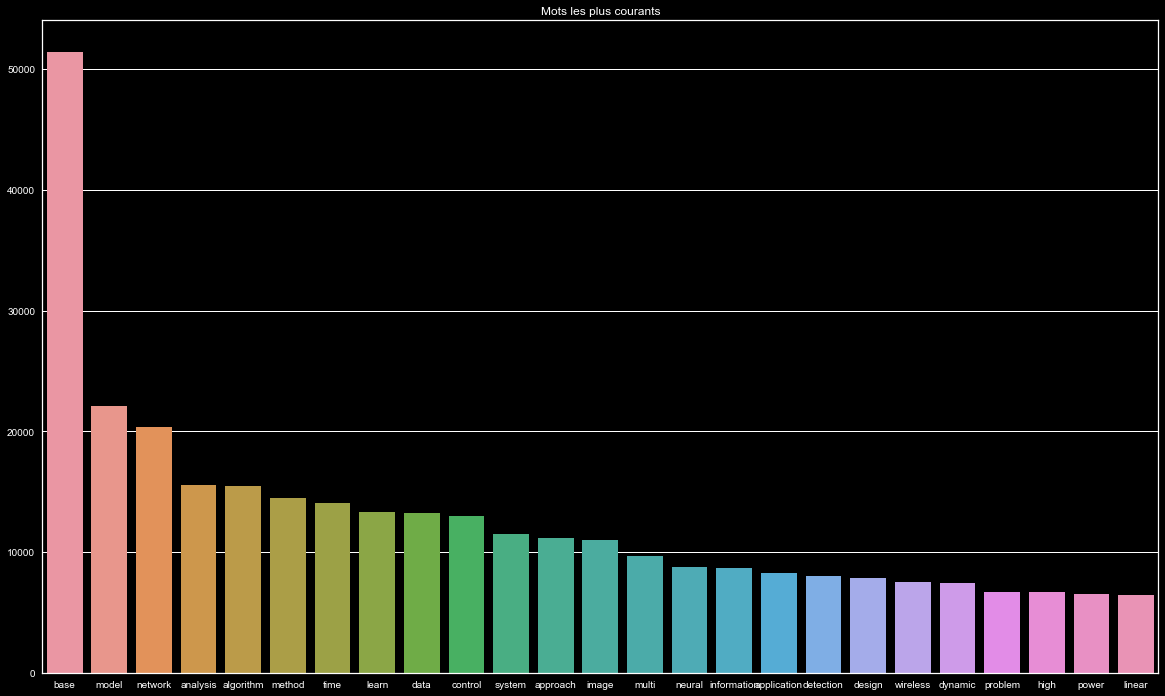

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=common_words2,y=common_counts2)
plt.title('Mots les plus courants')
plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/count_after_lemmatization.png')

On voit que le mot based est sureprésenté et ne donne pas de sens aux texte. On va donc le supprimer (avant de faire la lemmatisation car les mots bases ou base ne signifie pas la même chose même si ils ne semblent pas très présents) 

#### <span style="color:red">Suppression du mot based</span>

In [32]:
article_titles = load_dict("nostopwords")

In [33]:
for i in article_titles:
    for j in article_titles[i].copy(): # on parcours une copie pour éviter certaines erreurs d'index
        if j=="based":
            article_titles[i].remove(j)

In [34]:
matching = [s for s in article_titles.values() if 'base' in s] # test de la présence du mot base
len(matching)

698

In [35]:
token_list1 = list(article_titles.values())

In [36]:
%%time
lemmatisation(article_titles)

Wall time: 18min 16s


In [37]:
token_list2 = list(article_titles.values())

In [38]:
all_words1=''
all_words2=''
for i in range(len(token_list1)):
    all_words1=all_words1 + ' '.join([k for k in token_list1[i]])
    all_words2=all_words2 + ' '.join([k for k in token_list2[i]])

# counts = Counter(all_words) : si on fait on aura la liste des lettres les plus courantes...
all_words_list1 = all_words1.split()
all_words_list2 = all_words2.split()
counts1 = Counter(all_words_list1)
counts2 = Counter(all_words_list2)

common_words1 = [word[0] for word in counts1.most_common(25)]
common_counts1 = [word[1] for word in counts1.most_common(25)]

common_words2 = [word[0] for word in counts2.most_common(25)]
common_counts2 = [word[1] for word in counts2.most_common(25)]

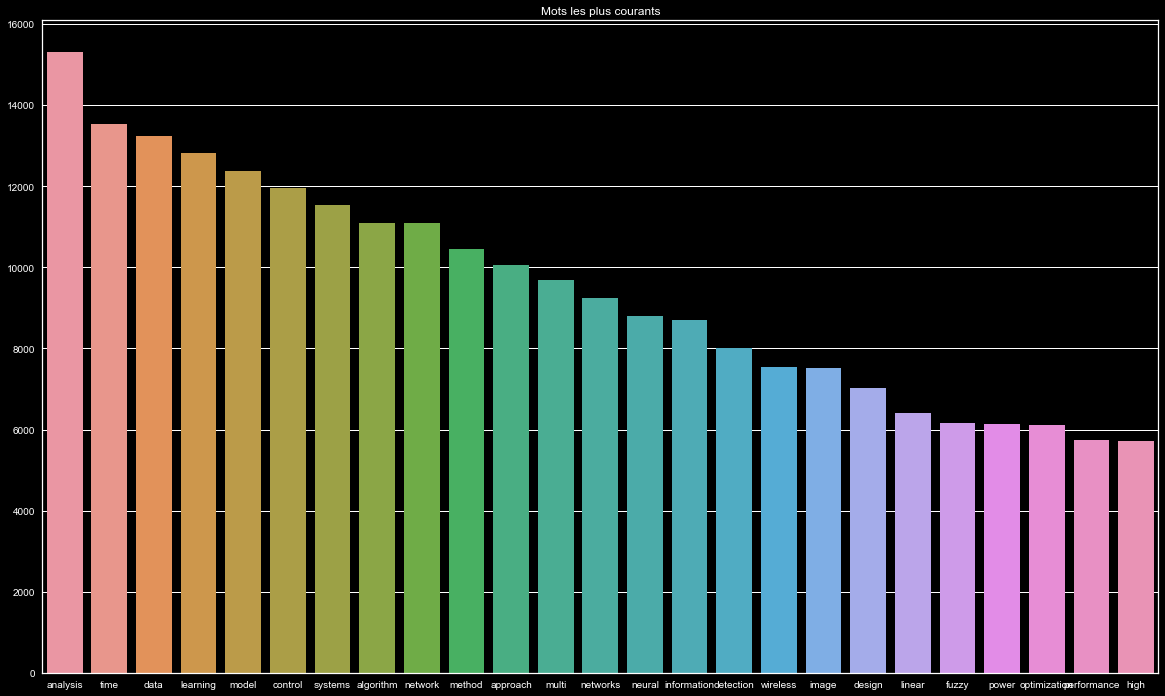

In [39]:
plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=common_words1,y=common_counts1)
plt.title('Mots les plus courants')
plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/count_before_lemmatization_without_based.png')

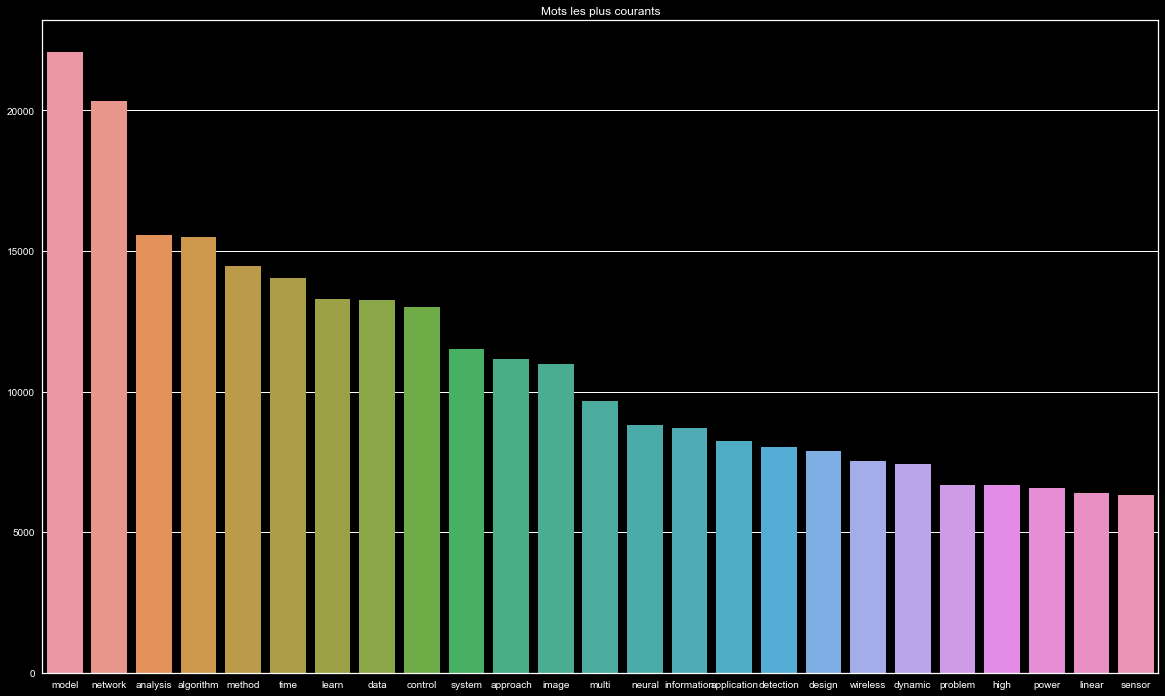

In [40]:
plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=common_words2,y=common_counts2)
plt.title('Mots les plus courants')
plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/count_after_lemmatization_without_based.png')

In [41]:
save_dict(article_titles, "lemmatized_without_based")